In [89]:
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis
import matplotlib.pyplot as plt
import numpy as np

# Linear Algebra in PyTorch and numpy

Inspired by 3Blue1Brown, Alfredo Canziani, and the book Mathematics for Machine Learning

In [91]:
set_default()

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Linear Combinations

 - Scaling
 - Span
    - The span of $\vec{v}$ and $\vec{w}$ is the set of all their possible linear combinations
    - Let the scalars $a$ and $b$ be all real numbers
 - Basis vectors
     - Is $\hat{i}$ and $\hat{j}$ of a 2d vector
     - 3d is $\hat{i}$, $\hat{j}$ and $\hat{k}$ 

Scaling two vectors by a "scalar" is called a linear combination between those two vectors

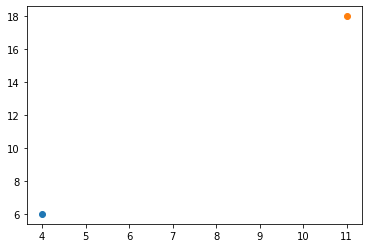

In [52]:
# Scaling - Linear combinations
v = np.array([1, 2])
w = np.array([3, 4])

vw = v + w
plt.scatter(vw[0], vw[1])

a = 5
b = 2

vwScale = a*v + b*w

# Linear combination
plt.scatter(vwScale[0], vwScale[1])
plt.show()

_Note_: The eigenvector is the vector not "knocked off" its span after a linear transformation

### Matrix Multiplication as a Composition

Linear transformations can be described by a matrix by following $\hat{i}$ and $\hat{j}$

The final matrix resulting from a "composition" of two transformations can be derived from:

. . .

_Insight_: Matrix-matrix or matrix-vector multiplication are really just linear transformations

tensor([[-1.5574,  0.5267],
        [ 1.5263, -0.5623]])
tensor([[ 0.7465,  1.3715],
        [-0.3952, -0.7891]])


tensor([[-1.3707, -2.5515],
        [ 1.3615,  2.5370]])


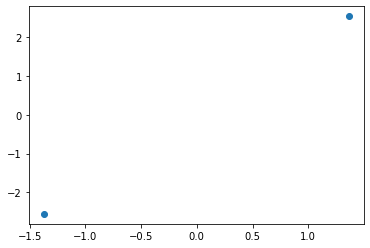

In [87]:
A = torch.randn(2, 2).to(device) 
B = torch.randn(2, 2).to(device)

AB = A @ B # matrix multiplication

print(A)
print(B)
print('\n')
print(AB)

# Following basis vectors i and j in 2d space
plt.scatter(AB[:, 0], AB[:, 1])

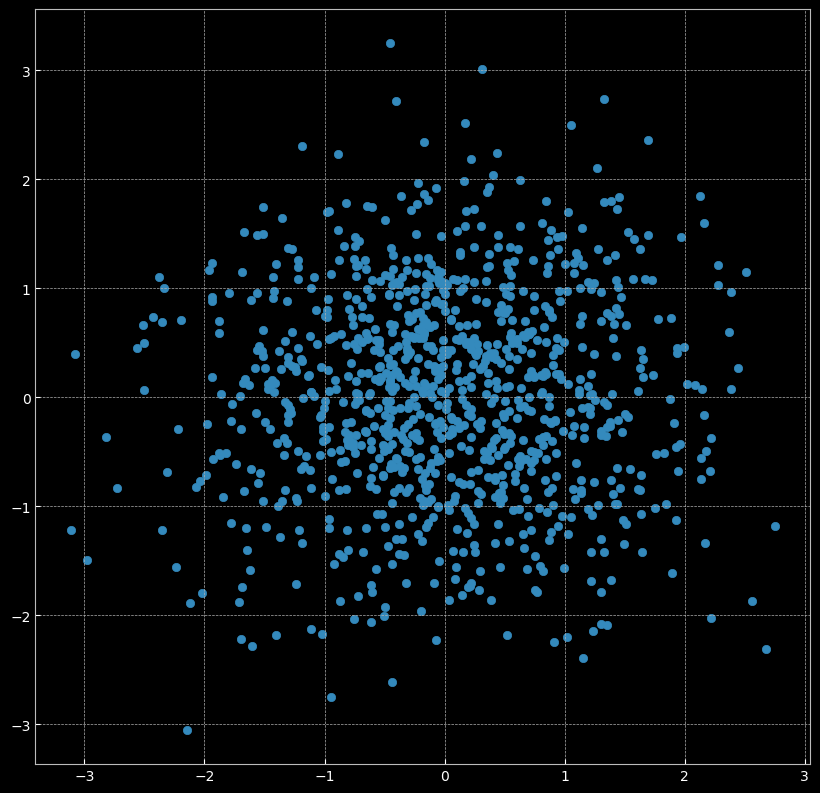

In [93]:
# generate some points in 2-D space
n_points = 1000

# Tensor with random number generation from Gaussian distribution - (1000, 2)
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

# Plotting random points
plt.scatter(X[:, 0], X[:, 1])

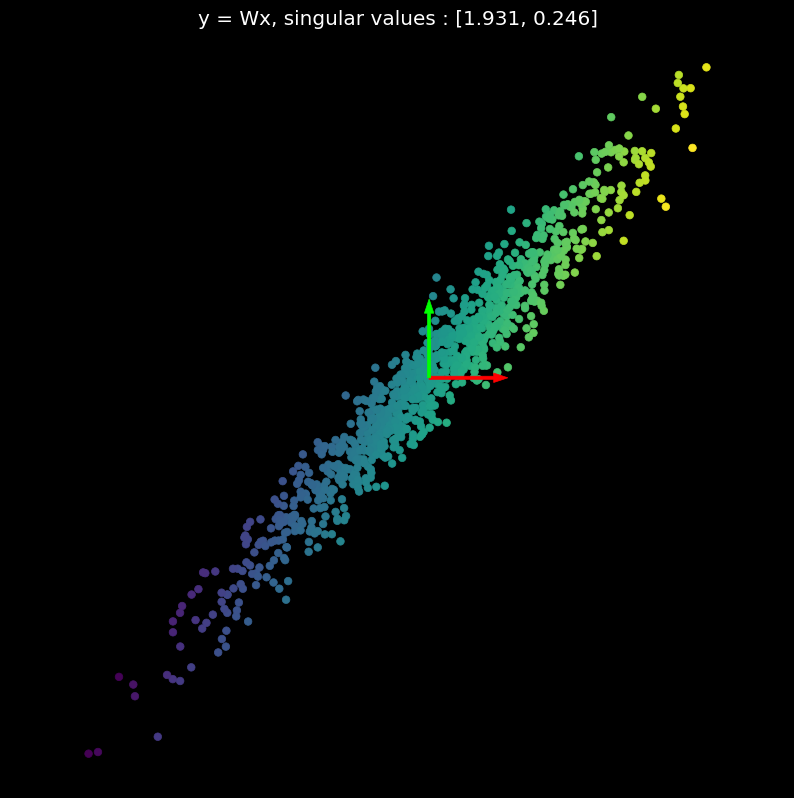

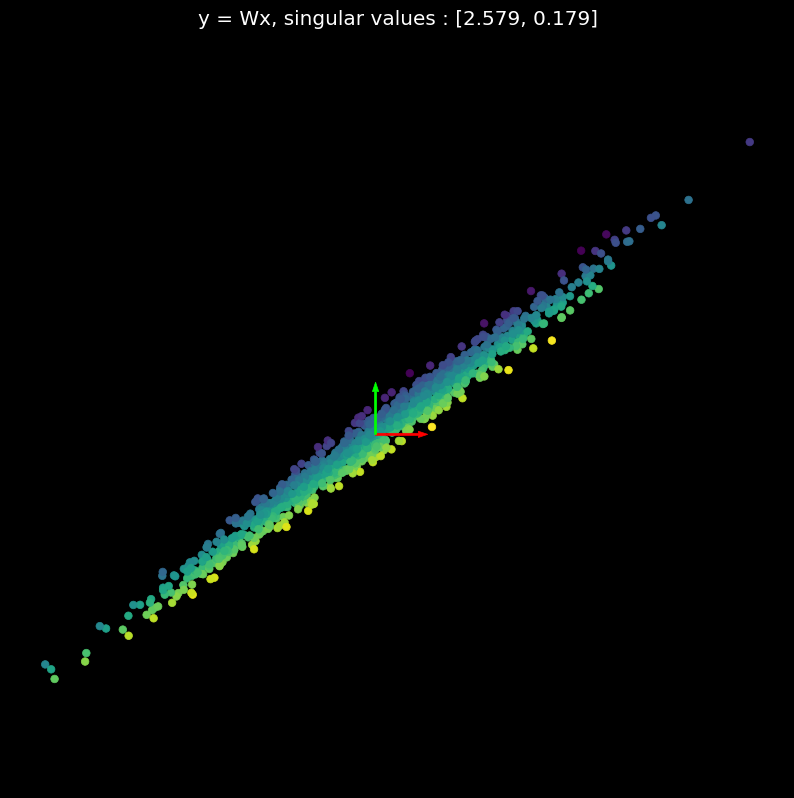

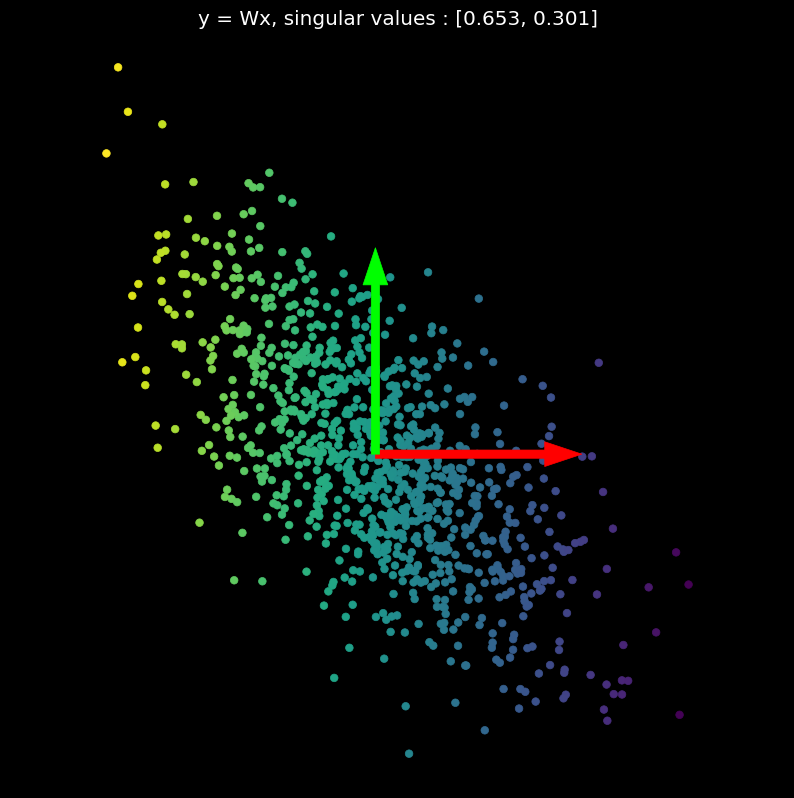

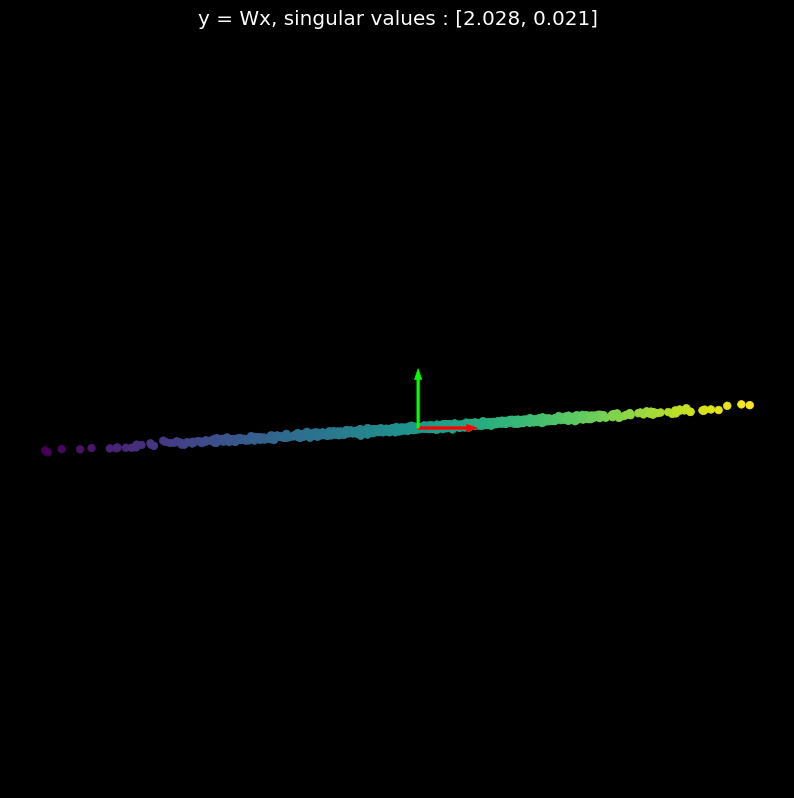

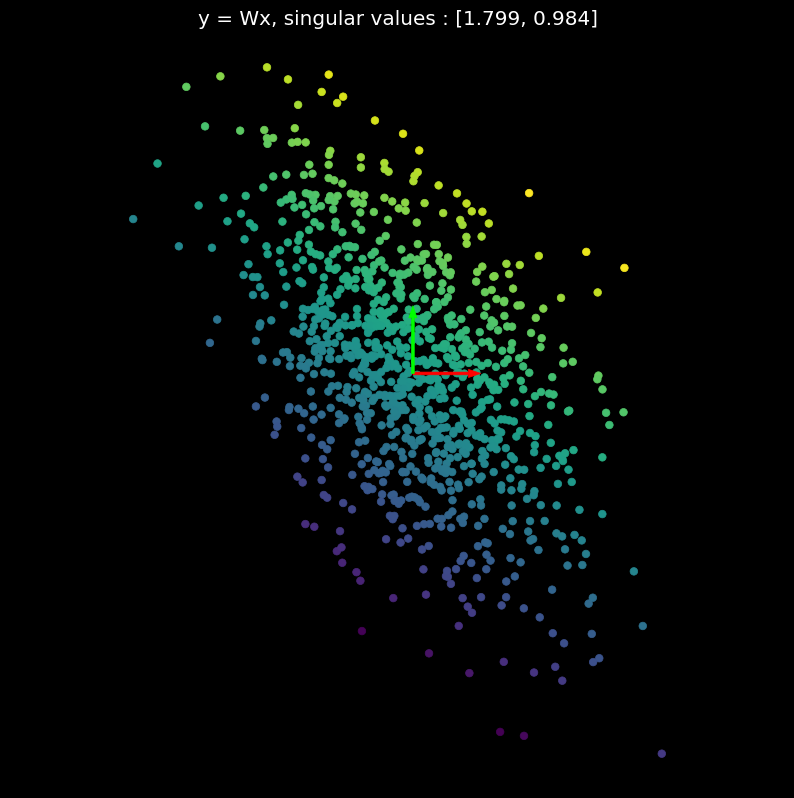

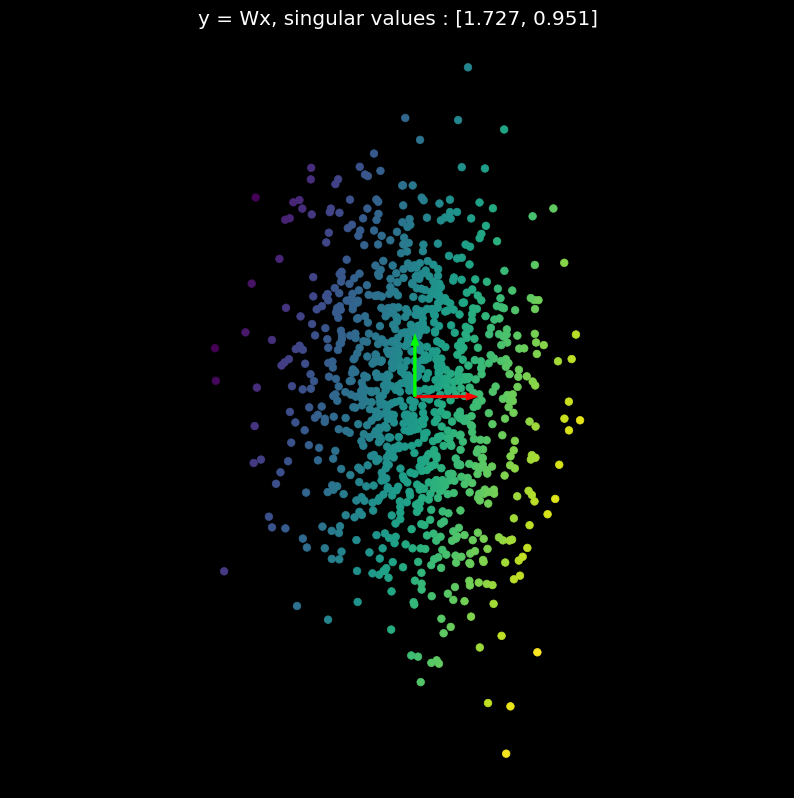

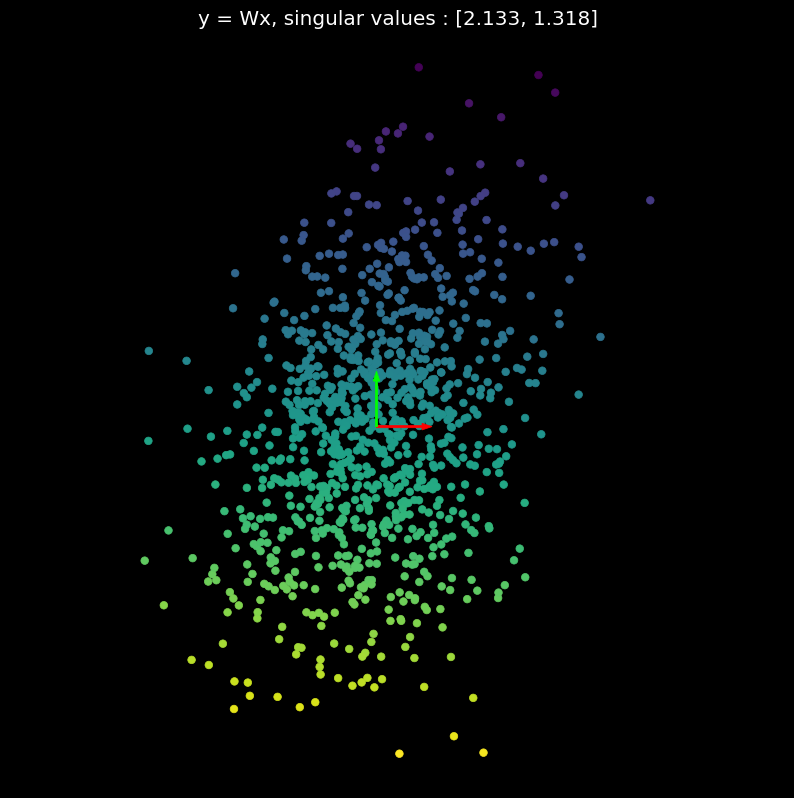

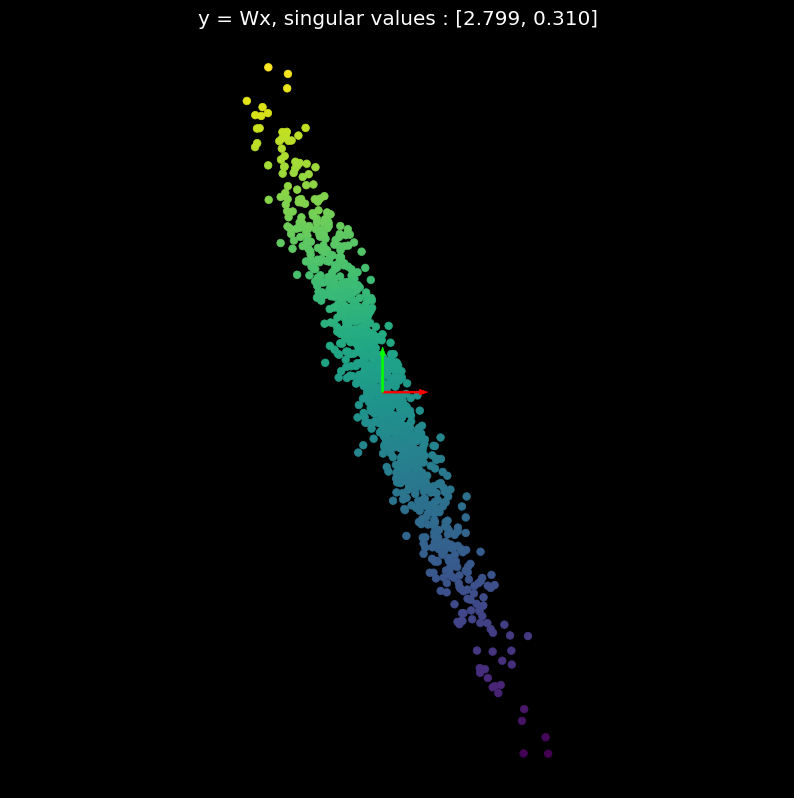

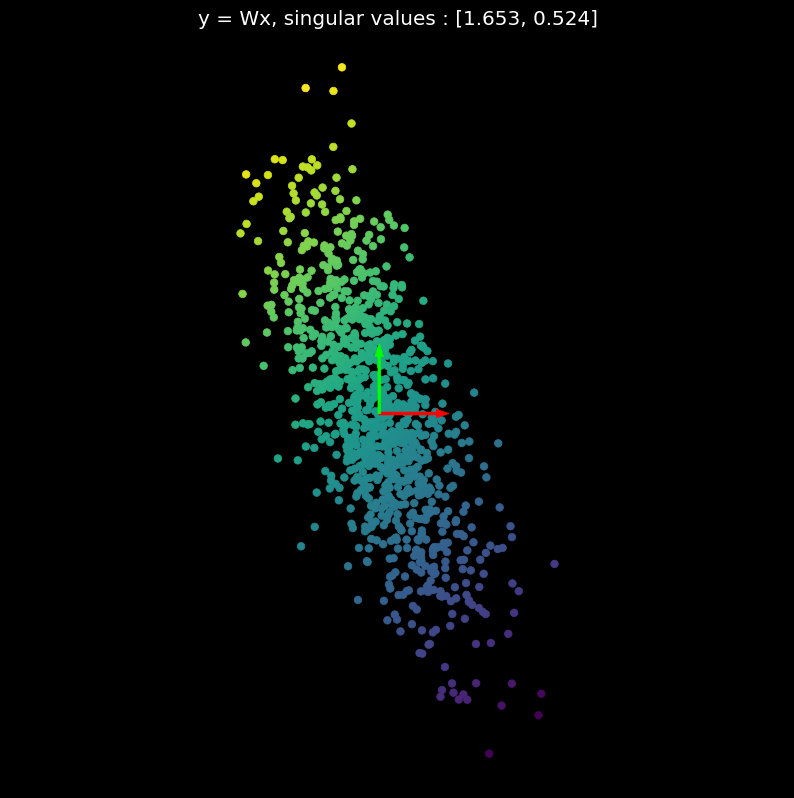

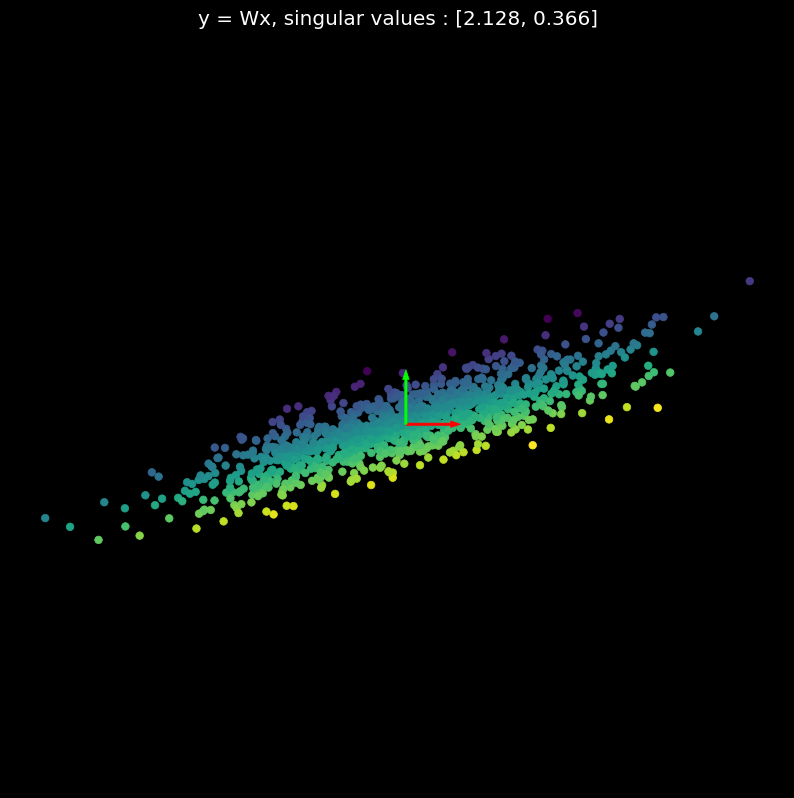

In [94]:
for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points - @ represents matrix multiplication in PyTorch
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    #plt.scatter(Y[:, 0], Y[:, 1])
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)
#    plot_bases(new_OI)